### Keras API Task

In [1]:
from tensorflow.keras.datasets import mnist

mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

#### Sequential API 

In [7]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

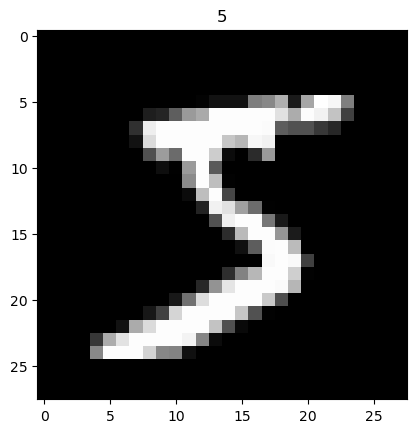

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_targets[0])
plt.show()

In [6]:
import numpy as np

def get_preprocessed_data(images, targets):
    images= np.array(images/255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [12]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [13]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - acc: 0.7547 - loss: 5.1371
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - acc: 0.8981 - loss: 0.4240
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - acc: 0.9186 - loss: 0.3276
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - acc: 0.9330 - loss: 0.2643
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - acc: 0.9387 - loss: 0.2464
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - acc: 0.9435 - loss: 0.2318
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - acc: 0.9491 - loss: 0.2009
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - acc: 0.9559 - loss: 0.1730
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - acc: 0.9566 - loss: 0.1625
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - acc: 0.9615 - loss: 0.1445
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - acc: 0.9641 - loss: 0.1252
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - acc: 0.9680 - loss: 0.1119
E

In [15]:
print(history.history['loss'])
print('=' * 80)
print(history.history['acc'])

[1.846414566040039, 0.4034433364868164, 0.3119399845600128, 0.2703855037689209, 0.25379860401153564, 0.22975081205368042, 0.20243839919567108, 0.1788381189107895, 0.16354867815971375, 0.15015700459480286, 0.1332201510667801, 0.11706264317035675, 0.11558584868907928, 0.10423257946968079, 0.09742385894060135, 0.09349929541349411, 0.08578138798475266, 0.08569153398275375, 0.08349239081144333, 0.07886170595884323]
[0.8270999789237976, 0.9024666547775269, 0.9220666885375977, 0.9331666827201843, 0.9377999901771545, 0.9435499906539917, 0.947950005531311, 0.9538666605949402, 0.9569166898727417, 0.9603333473205566, 0.9631666541099548, 0.9668166637420654, 0.9679333567619324, 0.9696166515350342, 0.9717833399772644, 0.9730666875839233, 0.9746166467666626, 0.9754999876022339, 0.9767666459083557, 0.9772499799728394]


In [16]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [17]:
pred_prob = model.predict(test_images)
print(pred_prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
[[3.73950388e-06 3.54082061e-07 1.22759984e-05 ... 9.99843240e-01
  1.04322041e-07 1.13536935e-05]
 [5.54640611e-10 1.76532731e-15 9.86936390e-01 ... 1.70680762e-17
  1.41092141e-05 1.37977178e-15]
 [7.00314207e-09 1.00000000e+00 6.89508095e-09 ... 4.92466401e-10
  6.84776513e-10 5.75010222e-12]
 ...
 [1.77345836e-17 2.37897581e-07 7.65188720e-17 ... 7.17128519e-14
  4.74603917e-13 5.44366003e-07]
 [2.49571704e-33 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.05982039e-37 0.00000000e+00]
 [1.98258354e-11 5.85421983e-22 1.28873072e-16 ... 9.43109309e-28
  4.75185225e-19 1.96764510e-16]]


In [18]:
pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[1.0000000e+00 6.5065253e-17 6.8319533e-10 9.2855775e-15 5.7879963e-09
  2.5944115e-11 2.4841010e-10 1.4312214e-15 5.4352630e-14 4.5660389e-08]]


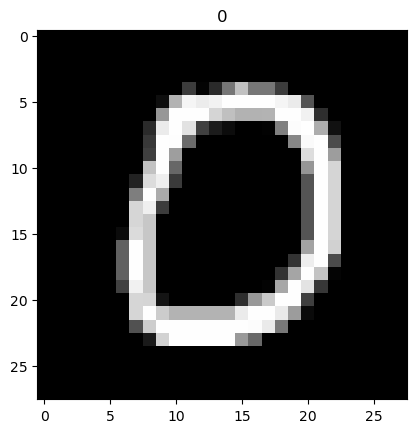

In [19]:
import matplotlib.pyplot as plt

class_names = ['0','1','2','3','4','5','6','7','8','9']
# print(class_names[pred_prob.flatten().argsort()[::-1][0]])

plt.imshow(test_images[10], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [20]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - acc: 0.9531 - loss: 0.2260


[0.2036721259355545, 0.9588000178337097]

### Validation

In [21]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [22]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [24]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = Adam(0.001), loss = CategoricalCrossentropy(), metrics=['acc'] )

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
history = model.fit(x=train_images,
                    y=train_oh_targets,
                    validation_data = (validation_images, validation_oh_targets),
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 2s - 1ms/step - acc: 0.9136 - loss: 0.2937 - val_acc: 0.9498 - val_loss: 0.1692
Epoch 2/20
1500/1500 - 1s - 629us/step - acc: 0.9597 - loss: 0.1327 - val_acc: 0.9632 - val_loss: 0.1232
Epoch 3/20
1500/1500 - 1s - 665us/step - acc: 0.9716 - loss: 0.0917 - val_acc: 0.9640 - val_loss: 0.1151
Epoch 4/20
1500/1500 - 1s - 660us/step - acc: 0.9773 - loss: 0.0733 - val_acc: 0.9682 - val_loss: 0.1074
Epoch 5/20
1500/1500 - 1s - 617us/step - acc: 0.9814 - loss: 0.0582 - val_acc: 0.9690 - val_loss: 0.1094
Epoch 6/20
1500/1500 - 1s - 675us/step - acc: 0.9848 - loss: 0.0475 - val_acc: 0.9724 - val_loss: 0.1046
Epoch 7/20
1500/1500 - 1s - 598us/step - acc: 0.9861 - loss: 0.0415 - val_acc: 0.9733 - val_loss: 0.0980
Epoch 8/20
1500/1500 - 1s - 587us/step - acc: 0.9893 - loss: 0.0328 - val_acc: 0.9705 - val_loss: 0.1087
Epoch 9/20
1500/1500 - 1s - 589us/step - acc: 0.9908 - loss: 0.0274 - val_acc: 0.9717 - val_loss: 0.1134
Epoch 10/20
1500/1500 - 1s - 598us/step - acc: 0.9914 - l

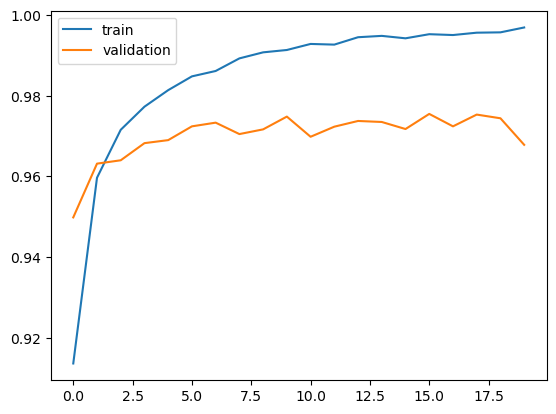

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.9999678e-01 4.7862548e-20 3.9061178e-11 2.2282704e-20 7.4062132e-07
  8.8624349e-21 1.1053908e-12 1.5321650e-12 4.9342502e-13 2.5553181e-06]]


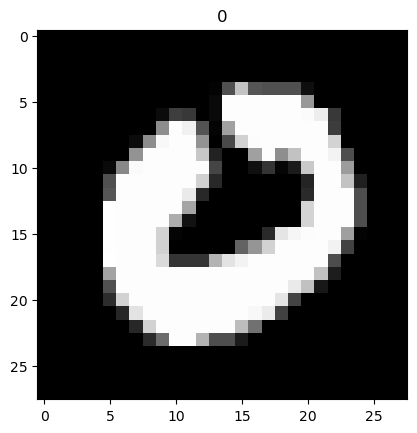

In [28]:
import matplotlib.pyplot as plt

class_names = ['0','1','2','3','4','5','6','7','8','9']

pred_prob = model.predict(np.expand_dims(test_images[25], axis=0))
print(pred_prob)

plt.imshow(test_images[25], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

### Functional API

In [29]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation ='relu')(x)
    x = Dense(128, activation = 'relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [39]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images/255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [40]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [41]:
np.unique(train_targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [43]:
model = create_model()
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [46]:
history = model.fit(x=train_images,
                   y=train_oh_targets,
                   batch_size=64,
                   epochs=20,
                   validation_data=(validation_images, validation_oh_targets),
                   verbose=2)

Epoch 1/20
750/750 - 1s - 754us/step - acc: 0.9969 - loss: 0.0098 - val_acc: 0.9738 - val_loss: 0.1340
Epoch 2/20
750/750 - 1s - 679us/step - acc: 0.9968 - loss: 0.0092 - val_acc: 0.9759 - val_loss: 0.1230
Epoch 3/20
750/750 - 1s - 698us/step - acc: 0.9957 - loss: 0.0121 - val_acc: 0.9740 - val_loss: 0.1401
Epoch 4/20
750/750 - 1s - 698us/step - acc: 0.9971 - loss: 0.0092 - val_acc: 0.9756 - val_loss: 0.1269
Epoch 5/20
750/750 - 1s - 689us/step - acc: 0.9987 - loss: 0.0042 - val_acc: 0.9750 - val_loss: 0.1329
Epoch 6/20
750/750 - 1s - 706us/step - acc: 0.9965 - loss: 0.0109 - val_acc: 0.9752 - val_loss: 0.1348
Epoch 7/20
750/750 - 1s - 702us/step - acc: 0.9967 - loss: 0.0094 - val_acc: 0.9742 - val_loss: 0.1453
Epoch 8/20
750/750 - 1s - 678us/step - acc: 0.9980 - loss: 0.0067 - val_acc: 0.9768 - val_loss: 0.1424
Epoch 9/20
750/750 - 1s - 683us/step - acc: 0.9979 - loss: 0.0065 - val_acc: 0.9716 - val_loss: 0.1658
Epoch 10/20
750/750 - 1s - 688us/step - acc: 0.9976 - loss: 0.0073 - val_

In [53]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.ylim(0.7, 1)
    plt.show()


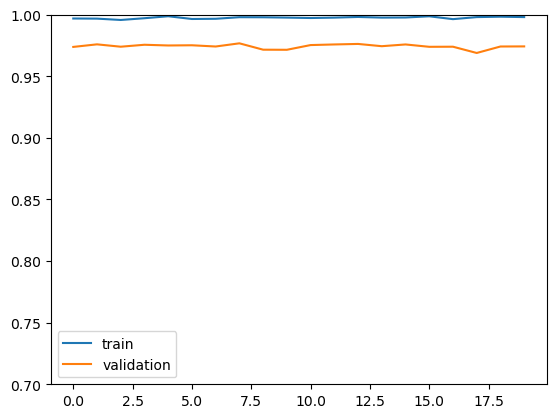

In [54]:
show_history(history)

In [49]:
pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.4905990e-37 3.3891491e-27 5.8172359e-32 1.5745372e-36 1.0000000e+00
  1.8710218e-29 1.1054201e-34 1.1390932e-18 2.1664473e-26 2.0510803e-19]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[1.4905990e-37 3.3891491e-27 5.8172359e-32 1.5745372e-36 1.0000000e+00
  1.8710218e-29 1.1054201e-34 1.1390932e-18 2.1664473e-26 2.0510803e-19]]


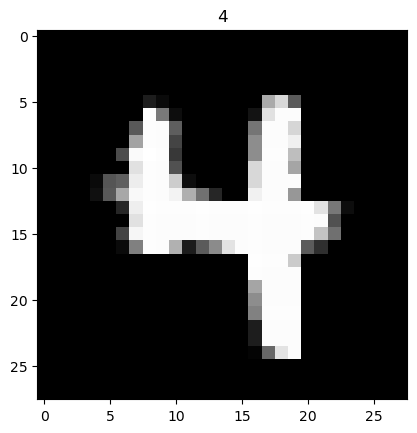

In [50]:
import matplotlib.pyplot as plt

class_names = ['0','1','2','3','4','5','6','7','8','9']

pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

plt.imshow(test_images[8500], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()